# 1. Trends of r/GameSwap and r/GameSale

Analysis:
1. The members of r/GameSwap and r/GameSale.
2. The confirmed trades and sales on r/GameSwap and r/GameSale.

In [1]:
# Load libraries
import json
import pickle
import requests
import re
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
from time import sleep
from bs4 import BeautifulSoup as bs


## 1. History of members of r/GameSale and r/GameSwap
In this section, we can see how the number of memebers in these two platforms evolves.

In [2]:
with open('./data/gamesale_member.pkl', 'rb') as f:
    date_members_sale = pickle.load(f)
    
with open('./data/gameswap_member.pkl', 'rb') as f:
    date_members_swap = pickle.load(f)

In [3]:
game_console_interested = ['Nintendo Switch-Initial version',
                          #  'New Nintendo 3DS-Initial version',
                           'PlayStation 5-Initial version',
                           'PlayStation 4-Initial version',
                           'PlayStation 3-Initial version',
                           'Xbox One-Xbox One X',
                           'Xbox One-Xbox One S',
                          'Nintendo 3DS-Initial version',
                        #   'Nintendo DSi-Initial version',
                          # 'PlayStation 3-Playstation 3 Slim',
                          # 'PlayStation 3-Playstation 3 Super Slim'
                          ]

In [4]:
# Load the console_date from csv
console_date = pd.read_csv('./data/console_released_date.csv', index_col=0)
# Change the date to %Y%m%d
console_date['date'] = [x.replace('-', '') for x in console_date['date']]
console_date_plot = console_date[console_date.index.isin(game_console_interested)].sort_values('date')

### 1.1 Plot the number of members in r/GameSale and r/GameSwap with console released dates.

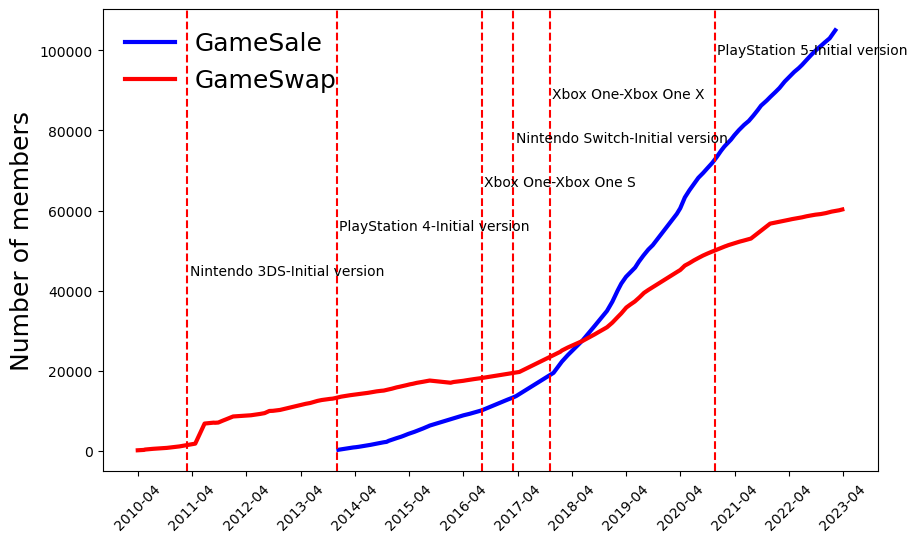

In [15]:
plt.figure(figsize=(10, 6))
# Plot the date and max_members
plt.plot([datetime.datetime.strptime(x[0], '%Y%m%d') for x in date_members_sale.items()], [x[1] for x in date_members_sale.items()], label='GameSale', color='blue', linewidth=3)
plt.plot([datetime.datetime.strptime(x[0], '%Y%m%d') for x in date_members_swap.items()], [x[1] for x in date_members_swap.items()], label='GameSwap', color='red', linewidth=3)
# Mark the console date
for i in range(len(console_date_plot)):
    plt.axvline(x=datetime.datetime.strptime(console_date_plot['date'][i], '%Y%m%d'), color='r', linestyle='--')
    plt.text(datetime.datetime.strptime(console_date_plot['date'][i], '%Y%m%d')+datetime.timedelta(days=15), 11000*(i+4), console_date_plot.index[i], rotation=0)
# Set the title
# plt.title('Number of members in gameswap and gamesale')
# Set the x-axis label and rotate the label
# plt.xlabel('Date')
plt.xticks(rotation=45)
# Set the y-axis label
plt.ylabel('Number of members', fontsize="18")
# Set the x-axis tick by month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
# Set the legend
plt.legend(loc='upper left', frameon=False, fontsize="18")
plt.grid(False)
# Save the figure, transparent=True to remove the white background
plt.savefig('plot/swap_sale_console_release.png', transparent=True)
# Show the figure
plt.show()

## 2. Get the history of the confirmed transactions
[SwapNSalebot](https://raw.githubusercontent.com/RegExrTech/SwapBot/master/database/gamesale-swaps.json) stores the history of the confirmed transactions on r/GameSwap and r/GameSale.

Run **get_confirmation_post.py** to get the detail information of the confirmation post.

### 2.1 Plot the trends for the three communities.

In [13]:
df = pd.read_pickle('./data/df_transformed_data.pkl')

<Figure size 640x480 with 0 Axes>

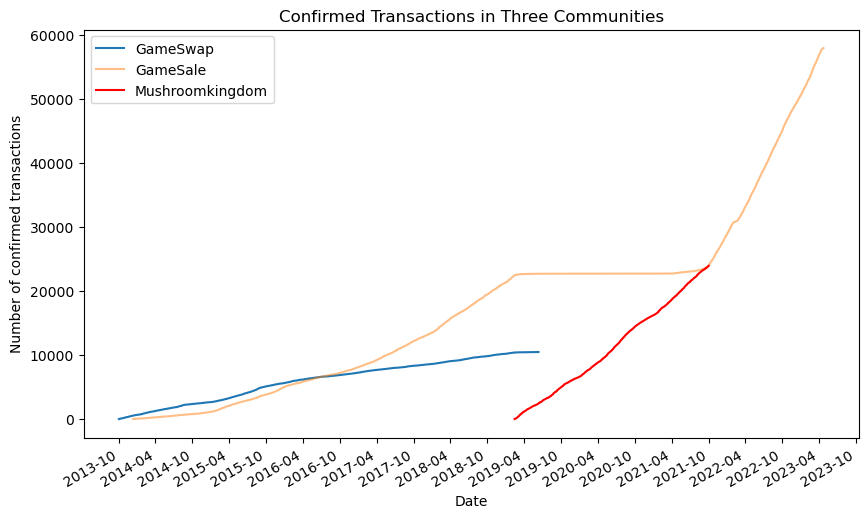

In [14]:
# Get the cumulative sum of the number of transactions per day of type 'gameswap'
plt.clf()
plt.figure(figsize=(10, 6))
df[df['type'] == 'gameswap'].groupby('created_utc').count()['index'].cumsum().plot()
df[df['type'] == 'gamesale'].groupby('created_utc').count()['index'].cumsum().plot(alpha=0.5)
df[df['type'] == 'mushroomkingdom'].groupby('created_utc').count()['index'].cumsum().plot(color='red')
plt.legend(['GameSwap', 'GameSale', 'Mushroomkingdom'])
plt.xlabel('Date')
plt.ylabel('Number of confirmed transactions')
plt.title('Confirmed Transactions in Three Communities')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.savefig('plot/confirmed_preprocess.png',dpi=300, transparent=True)
plt.show()
